# Social Network Ads

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

## Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

## Importing the Dataset 

In [2]:
df = pd.read_csv("R:\\GUVI\\Tasks\\Task-7\\Logistic Regression\\Social_Network_Ads.csv")

# Data Preprocessing

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df = df.drop_duplicates()

In [8]:
df = df.drop("User ID",axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df.Gender = LE.fit_transform(df.Gender)

## Splitting the Dataset into the Training set and Test set 

In [10]:
x = df.loc[:,["Gender","Age", "EstimatedSalary"]].values
y = df.loc[:,"Purchased"].values

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

## Feature Scaling 

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Fitting Decision Tree Classification to the Training set 

In [13]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

## Hyperparameter Tuning 

In [14]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40]:
    DT = DecisionTreeClassifier(max_depth=i)
    DT.fit(x_train, y_train)
    from sklearn.model_selection import cross_val_score
    print("Depth:",i,"Dt score:", DT.score(x_test, y_test), "CV score:", np.mean(cross_val_score(DT, x_train, y_train, cv=10)))

Depth: 1 Dt score: 0.8416666666666667 CV score: 0.8321428571428571
Depth: 2 Dt score: 0.9166666666666666 CV score: 0.9142857142857143
Depth: 3 Dt score: 0.8833333333333333 CV score: 0.9071428571428571
Depth: 4 Dt score: 0.8833333333333333 CV score: 0.8964285714285714
Depth: 5 Dt score: 0.8666666666666667 CV score: 0.8821428571428571
Depth: 6 Dt score: 0.8333333333333334 CV score: 0.9
Depth: 7 Dt score: 0.825 CV score: 0.8892857142857145
Depth: 8 Dt score: 0.8166666666666667 CV score: 0.8928571428571429
Depth: 9 Dt score: 0.8416666666666667 CV score: 0.8928571428571429
Depth: 10 Dt score: 0.825 CV score: 0.8964285714285716
Depth: 20 Dt score: 0.8416666666666667 CV score: 0.9
Depth: 30 Dt score: 0.8416666666666667 CV score: 0.8964285714285716
Depth: 40 Dt score: 0.8416666666666667 CV score: 0.8928571428571429


In [15]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=5)
DT.fit(x_train, y_train)
np.mean(cross_val_score(DT, x_train, y_train, cv=10))

0.8857142857142858

## Predicting the Test set Results 

In [16]:
y_pred = DT.predict(x_test)

In [17]:
pd.DataFrame({"act":y_test, "pre":y_pred})

,act,pre
0,0,0
1,1,1
2,0,0
3,0,0
4,1,0
...,...,...
115,1,1
116,0,0
117,0,0
118,1,1


## Making the Confusion Matrix 

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[73,  6],
       [10, 31]], dtype=int64)

## Visualising the Training Set Results 

Train Accuracy: 0.9425 CV Score: 0.8750000000000002


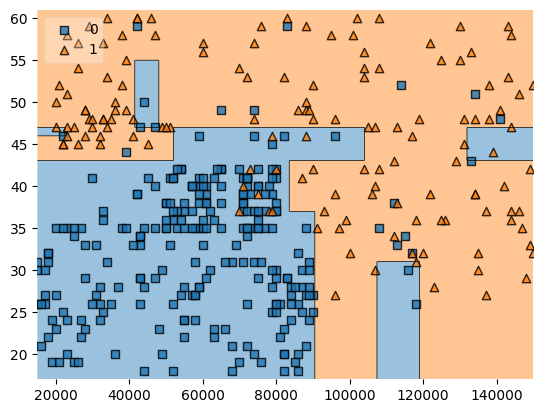

In [19]:
x = df[["EstimatedSalary","Age"]].values
y = df["Purchased"].astype(int).values
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x,y)
from sklearn.model_selection import cross_val_score
print("Train Accuracy:", dt.score(x,y),"CV Score:", np.mean(cross_val_score(dt,x,y,cv=10)))
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,clf=dt,legend=2)
plt.show()

## Visualising the Test Set Results 

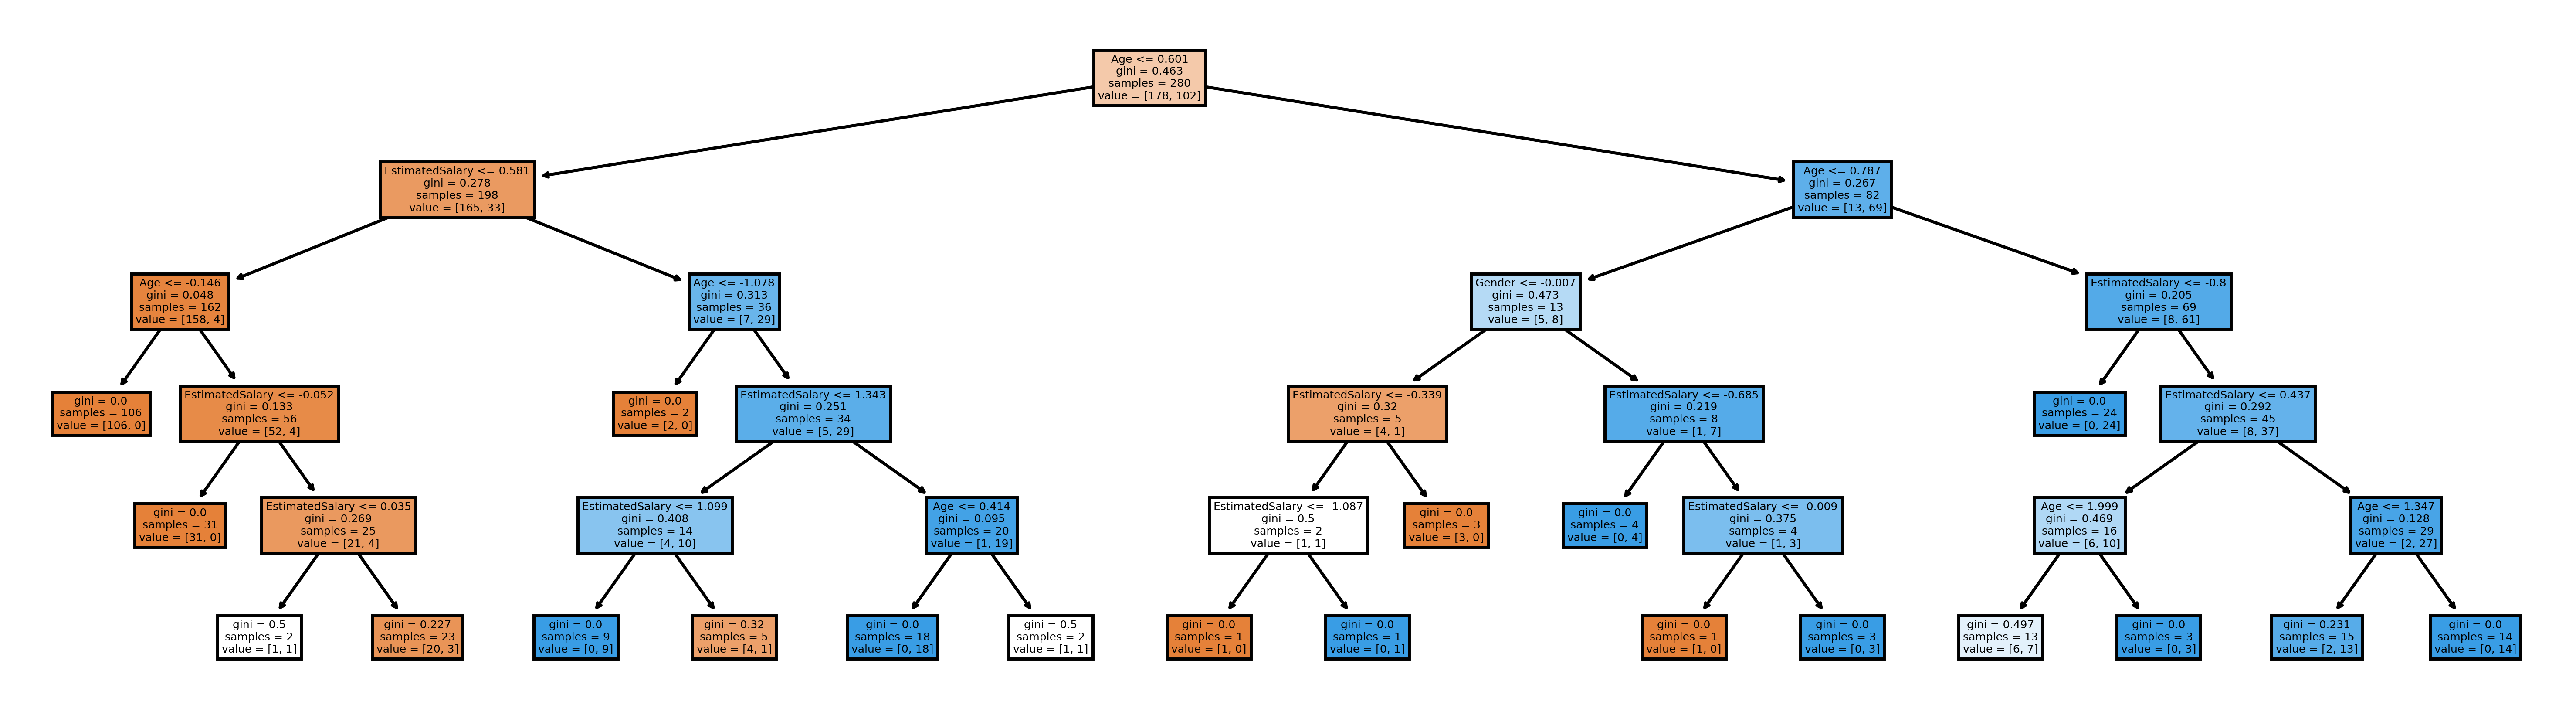

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,4), dpi=500)
tree.plot_tree(DT,
               feature_names = ["Gender","Age", "EstimatedSalary"],
               filled = True);
fig.savefig('imagename.png')